# Intro to Machine Learning on Coursera

Based on the [Machine Learning Specialization course by Andrew Ng](https://www.coursera.org/specializations/machine-learning-introduction)

In [1]:
# Imports
import random
from sympy import symbols, diff, lambdify
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Supervised Machine Learning: Regression and Classification

### Polynomial Regression

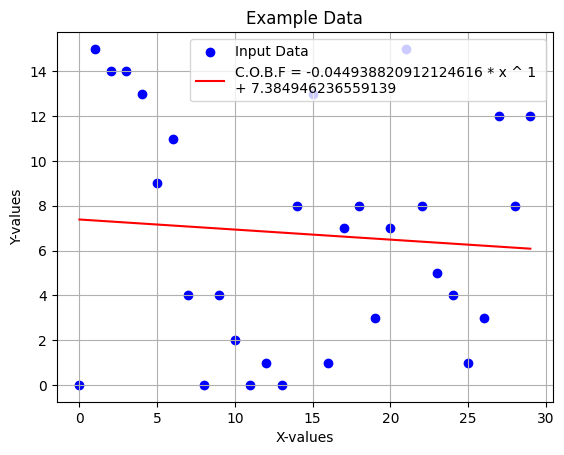

In [2]:
# Polynomial regression
polyDeg = 1

# Training data
xArr:npt.NDArray[np.int64] = np.array([x for x in range(0, 30)])
yArr:npt.NDArray[np.int64] = np.array([random.randint(0, 15) for y in range(0, 30)])
# Curve of best fit and weights
predWeights:npt.NDArray[np.float64] = np.polyfit(xArr, yArr, polyDeg) 
bestFitCurve:npt.NDArray[np.float64] = np.polyval(predWeights, xArr)

# Format polynomial function strings
def extrapolatePolynomials():
    functionString:str = ""
    displayString:str = ""
    # Generate strings
    for index in range(len(predWeights)):
        currDeg:int = len(predWeights) - index - 1
        functionString += f"{predWeights[index]}" 
        displayString += f"{predWeights[index]}"
        if currDeg > 0:
            functionString += f" * x ** + {currDeg} + "
            displayString += f" * x ^ {currDeg} \n+ "
    
    #Generate executable polynomial function from functionString
    executablePolynomial:function = lambdify(["x"], functionString)
    return (executablePolynomial, displayString)

#Store function and configured string for later
bestFitPoly, cobfStr = extrapolatePolynomials()

# Plot
plt.figure()
plt.scatter(xArr, yArr, color="blue", label="Input Data")
plt.plot(xArr, bestFitCurve, color="red", label=f"C.O.B.F = {cobfStr}")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Example Data")
plt.legend()
plt.grid(True)
plt.show()

### Gradient Descent

In [3]:
# Gradient descent on a known cost function
# Cost function, f(x)
def cost_func(x:float):
    return bestFitPoly(x) # calculated earlier from COBF
# Gradient of the cost function, f'(x)
def gradient(x:float):
    a = symbols('x')
    f_prime = diff(cost_func(a), a)
    derivative:function = lambdify(["x"], f_prime)
    return derivative(x)

# Gradient Descent parameters
learnRate:float = 2**(-8) # Step size 1/(2^8)
iterations:int = 10_000 # Number of iterations
xGuess:float = 0.0 # Initial guess for x (starting point)

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = gradient(xGuess)
    
    # Update x using the Gradient Descent formula
    xGuess = xGuess - learnRate * grad

# The value of x after optimization represents the minimum of the cost function
minimum_x:float = xGuess
minimum_cost:float = cost_func(minimum_x)

# Print the result
print(f"Minimum value of x: {minimum_x}")
print(f"Minimum cost: {minimum_cost}")

Minimum value of x: 1.7554226918801867
Minimum cost: 7.306059610583655


### Logistic Regression

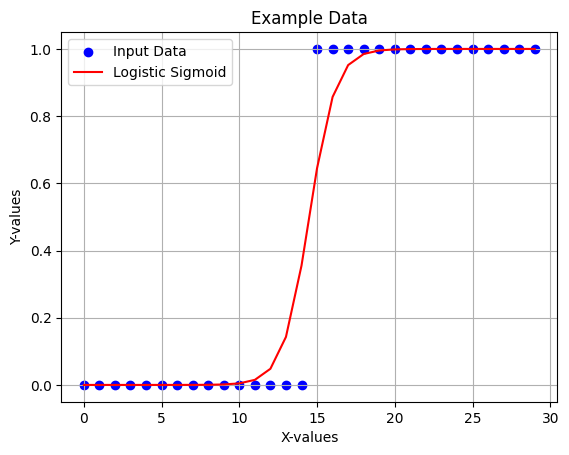

In [4]:
# Classification via Logistic Regression
xArr = np.array([x for x in range(0, 30)])
yArr = np.array([0 for y in range(0, 15)]
                + [1 for y in range(15, 30)]) # either 0 or 1

# Create an instance of a logistic regressor
logReg = LogisticRegression()
logReg.fit(xArr.reshape(-1, 1), yArr)
# Should match yArr, since "testing" with the training input
# print(logReg.predict(xArr.reshape(-1, 1))) 

# Plot
plt.figure()
plt.scatter(xArr, yArr, color="blue", label="Input Data")

plt.plot(xArr, logReg.predict_proba(xArr.reshape(-1, 1))[:,1],
        color="red", label="Logistic Sigmoid")# only plot the probability of being 1
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Example Data")
plt.legend()
plt.grid(True)
plt.show()

### Polynomial and Logistic Regression

- Maybe todo, Idk yet

In [5]:
print("TODO later")

TODO later


## Advanced Learning Algorithms

In [19]:
import tensorflow as tf
from tensorflow import nn
import keras
from keras import layers, losses

### Simple Tensorflow Inference

In [7]:
# Roasting coffee beans at 200 degrees Celsius, for 17 minutes
inputArr:npt.NDArray[np.float64] = np.array([[200.0, 17.0]])

"""
Structure of the neural network:
         x
in  =>   x   =>  a1   => a2(out)
         x
        (1x3)   (1x1)
"""

# Create the first layer (3 neurons receiving inputArr, w/ a sigmoid activation)
layer1:layers.Dense = layers.Dense(units=3, activation="sigmoid") # 1x3 tensor
a1:layers.Dense = layer1(inputArr) # output of layer1 when given inputArr
print(a1) # lists the tensor, its shape (1x3), and its type (float)
# print(layer1.weights) # lists the weights of the layer

#Create the second layer (1 neuron receiving layer1, w/ a sigmoid activation)
layer2:layers.Dense = layers.Dense(units=1, activation="sigmoid") # 1x1 tensor
a2:layers.Dense = layer2(a1) # output of layer2 when given a1 (output of layer1)
print(a2)
# print(layer2.weights)

# Do processing with the output of the final layer (in this case, a2)
yHat:int
if(a2 >= 0.5):
    yHat = 1
else:
    yHat = 0
print(f"Coffee roasted good?: {yHat}")
# Note the seemingly-random output due to not controling the layers' "training"

tf.Tensor([[0. 0. 0.]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.5]], shape=(1, 1), dtype=float32)
Coffee roasted good?: 1


In [12]:
# Alternatively, string the layers together into a sequence
# Then call the complete model at once
# This should be optimized for training compared to running individual layers once
myModel:keras.Sequential = keras.Sequential(
    [ # Identical to the previously-defined layers 1 and 2
        layers.Dense(units=3, activation="sigmoid"),
        layers.Dense(units=1, activation="sigmoid") 
    ]
)# Convention to define the layers in the model but can be defined beforehand 

# Training x and y values
xTrainArr:npt.NDArray[np.float64] = np.array(
    [
        [200.0, 17.0],
        [120.0, 5.0],
        [425.0, 20.0],
        [212.0, 18.0]
    ]
)
yTrainArr:npt.NDArray[np.int64] = np.array([1, 0, 0, 1])

# Compile the model, then fit the data to the model
# myModel.compile() #???
# myModel.fit(xTrainArr, yTrainArr)

### Bonus: Defining the "Dense" Function

In [13]:
# Sigmoid Function
def sigmoid(inputArr:npt.NDArray[np.float64]):
    return 1/(1 + np.exp(-inputArr))

# Rough definition for the vectorized "Dense" function
def myDense(
        A_in:npt.NDArray[np.float64],
        W:npt.NDArray[np.float64],
        B:npt.NDArray[np.float64]
    ):
    # np.matmul does matrix multiplication btwn A_in and W 
    Z:npt.NDArray[np.float64] = np.matmul(A_in, W) + B
    # Return as A_out the sigmoid (activation function) of Z
    return sigmoid(Z)


### Neural Network Training

In [14]:
# Recall the previously defined Neural Net model (myModel)
# To train it, compile with the appropriate loss function, then fit the data

# BinaryCrossentropy is a loss function based on the logistic loss function
# Other loss function exist, such as MeanSquaredError
myModel.compile(loss=losses.BinaryCrossentropy())
myModel.fit(xTrainArr, yTrainArr, epochs=100) # Train for 100 epochs

"""
Recommendations for activation functions (g(z)) (not to be confused with loss functions):
___Output Layer___
Binary classification: Sigmoid
Regression with positive/negative outputs: Linear
Regression with only natual numbers outputs (0 and +): ReLU
___Hidden Layer___
Most-common/generally faster: ReLU
Binary classification: Sigmoid
"""

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7906
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7886
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.7872
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.7860
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.7849
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.7840
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.7831
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.7823
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.7815
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.7807
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - loss: 0.7800
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.7793
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.7786
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.7779
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - loss: 0.7773
Epoch 16/100
1/1

'\nRecommendations for activation functions (g(z)) (not to be confused with loss functions):\n___Output Layer___\nBinary classification: Sigmoid\nRegression with positive/negative outputs: Linear\nRegression with only natual numbers outputs (0 and +): ReLU\n___Hidden Layer___\nMost-common/generally faster: ReLU\nBinary classification: Sigmoid\n'

### Multi-Class Classification via SoftMax

For each possible class, we calculate the corresponding Logistic Regression:

$$ z_{n} = \vec{w_{n}} \cdot \vec{x} + b_{n} $$

From there, we apply the SoftMax activation function for each possible class, where we calculate $ a_n = P(y = n) $ for a given $ \vec{x} $:
$$ a_{n} = \frac{e^{z_{n}}}{\sum_{i=1} ^ {n} e^{z_{i}}} = P(y = n|\vec{x}) $$

Note: $ \sum_{i=1} ^ {n} a_i = 1 $

In [22]:
"""
Note: a recommended loss function for SoftMax is SparseCategoricalCrossentropy
"""
# SoftMax implementation:
mySoftMaxModel:keras.Sequential = keras.Sequential(
    [ # 2 hidden ReLU layers and an outer Linear layer
        layers.Dense(units=25, activation="relu"),
        layers.Dense(units=15, activation="relu"),
        layers.Dense(units=10, activation="linear") # 10 possible classes
    ]
)
# Outer layer should be SoftMax, but TensorFlow optimizations allow the alternative
# Likewise to optimize binary classification, use Linear instead of Sigmoid here

# Optimized loss function is SparseCategoricalCrossentropy(from_logits=True)
# Likewise for binary classification, we have BinaryCrossentropy(from_logits=True)
# Using the activation function directly here allows TensorFlow optimizations
mySoftMaxModel.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=True))

"""
The compiled data now predicts z_1 through z_10 instead of a_1 through a_10
You must run predictions using the SoftMax/Sigmoid function afterwards
(Per the model type)
"""
# X_sfm = ???
# Y_sfm = ???
# mySoftMaxModel.fit(X_sfm, Y_sfm, epochs=100)
# logits = mySoftMaxModel(X_sfm)
# f_x = tf.nn.softmax(logits)

"""
Note: Multi-Label Classification: multiple classes, any combination can be right
Each label is checked for "independently", though there is only one model
(NOT to be confused with Multi-Classification: multiple classes, only one is right)
"""

'\nNote: Multi-Label Classification: multiple classes, any combination can be right\nEach label is checked for "independently", though there is only one model\n(NOT to be confused with Multi-Classification: multiple classes, only one is right)\n'

## Unsupervised Learning, Recommenders, Reinforcement Learning

### TBD